In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("SICK.txt", sep="\t")
df = df[["sentence_A", "sentence_B", "entailment_label"]]
print("原始資料形狀:", df.shape)

df["entailment_label"] = df["entailment_label"].str.lower()
label2id = {"contradiction": 0, "entailment": 1, "neutral": 2}
df["label_id"] = df["entailment_label"].map(label2id)

df["text"] = df["sentence_A"] + " " + df["sentence_B"]

train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df["label_id"], random_state=42
)
print("訓練集形狀:", train_df.shape, "測試集形狀:", test_df.shape)

原始資料形狀: (9840, 3)
訓練集形狀: (7872, 5) 測試集形狀: (1968, 5)


In [4]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_df["text"])

X_train_full = vectorizer.transform(train_df["text"])  # 訓練特徵
X_test = vectorizer.transform(test_df["text"])           # 測試特徵

y_train_full = train_df["label_id"].values
y_test = test_df["label_id"].values


使用訓練資料比例 1.0 (共 7872 筆資料)
Test Accuracy: 0.5386
Classification Report:
               precision    recall  f1-score   support

contradiction       0.22      0.15      0.18       285
   entailment       0.37      0.30      0.33       564
      neutral       0.65      0.75      0.70      1119

     accuracy                           0.54      1968
    macro avg       0.41      0.40      0.40      1968
 weighted avg       0.51      0.54      0.52      1968

Confusion Matrix:
[[ 44  95 146]
 [ 85 172 307]
 [ 73 202 844]]


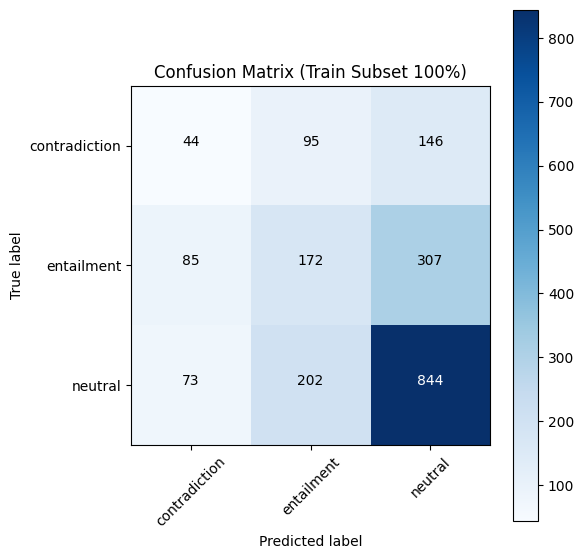


使用訓練資料比例 0.5 (共 3936 筆資料)
Test Accuracy: 0.4766
Classification Report:
               precision    recall  f1-score   support

contradiction       0.18      0.16      0.17       285
   entailment       0.33      0.32      0.32       564
      neutral       0.61      0.64      0.62      1119

     accuracy                           0.48      1968
    macro avg       0.37      0.37      0.37      1968
 weighted avg       0.47      0.48      0.47      1968

Confusion Matrix:
[[ 45  94 146]
 [ 74 181 309]
 [129 278 712]]


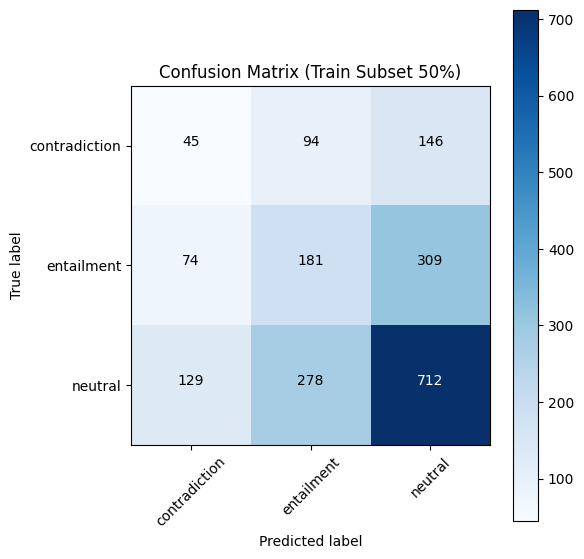


使用訓練資料比例 0.25 (共 1968 筆資料)
Test Accuracy: 0.4710
Classification Report:
               precision    recall  f1-score   support

contradiction       0.21      0.19      0.20       285
   entailment       0.32      0.29      0.30       564
      neutral       0.60      0.63      0.61      1119

     accuracy                           0.47      1968
    macro avg       0.37      0.37      0.37      1968
 weighted avg       0.46      0.47      0.46      1968

Confusion Matrix:
[[ 55  78 152]
 [ 71 163 330]
 [140 270 709]]


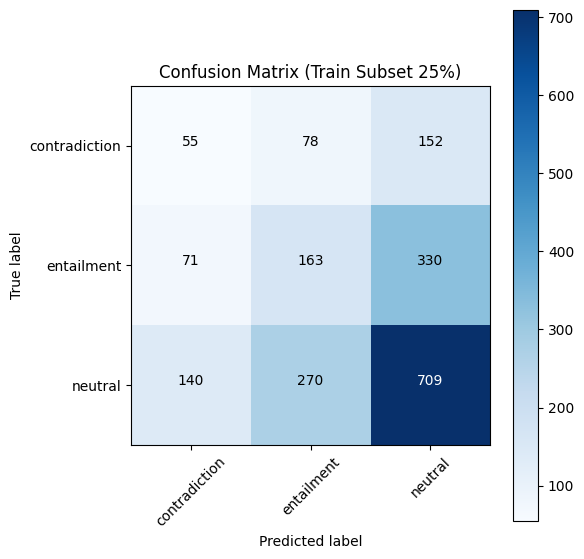


使用訓練資料比例 0.1 (共 787 筆資料)
Test Accuracy: 0.4284
Classification Report:
               precision    recall  f1-score   support

contradiction       0.18      0.20      0.19       285
   entailment       0.29      0.27      0.28       564
      neutral       0.57      0.56      0.57      1119

     accuracy                           0.43      1968
    macro avg       0.35      0.35      0.35      1968
 weighted avg       0.43      0.43      0.43      1968

Confusion Matrix:
[[ 58  64 163]
 [ 93 154 317]
 [175 313 631]]


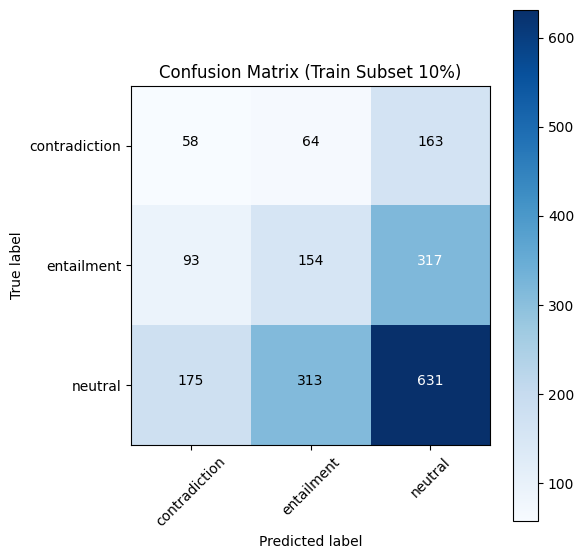

In [5]:
fractions = [1.0, 0.5, 0.25, 0.1]

for frac in fractions:
    num_samples = int(X_train_full.shape[0] * frac)
    X_train = X_train_full[:num_samples]
    y_train = y_train_full[:num_samples]
    
    print(f"\n使用訓練資料比例 {frac} (共 {num_samples} 筆資料)")
    
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    target_names = list(label2id.keys())
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Train Subset {int(frac*100)}%)")
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()
